# Newmark sliding block method in a spatial domain

© 2023 Exneyder A. Montoya-Araque, Silvana Montoya-Noguera, and Universidad EAFIT.

<!-- The methods shown in this notebook specifically refer to the [Fast Fourier Transform (FFT)](https://en.wikipedia.org/wiki/Fast_Fourier_transform), which is a specific algorithm to apply the [Discrete Fourier Transform (DFT)](https://en.wikipedia.org/wiki/Discrete_Fourier_transform). -->

This notebook can be interactively run in [Google - Colab](https://colab.research.google.com/github/AppliedMechanics-EAFIT/soil_dynamics/blob/main/notebooks/pynewmarkdisp_dummy_example.ipynb).


## Required modules and global setup for plots

In [1]:
if 'google.colab' in str(get_ipython()):
    from google.colab import output
    output.enable_custom_widget_manager()
    %pip install ipympl &> ~/pip-log.txt
    %pip install pynewmarkdisp &> ~/pip-log.txt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pynewmarkdisp.newmark import direct_newmark, plot_newmark_integration
from pynewmarkdisp.infslope import factor_of_safety, get_ky
from pynewmarkdisp.spatial import *
from ipywidgets import widgets as wgt

%matplotlib widget

plt.style.use("default")
mpl.rcParams.update(
    {
        'interactive': False,
        "text.usetex": False,  # Use mathtext, not LaTeX
        "font.family": "cmr10",  # Use the Computer modern font
        "mathtext.fontset": "cm",
        "axes.formatter.use_mathtext": True,
        "axes.unicode_minus": False,
    }
)
def display_fig(fig, static_fig=False):
    if static_fig and 'google.colab' in str(get_ipython()):
        display(fig)
    else:
        plt.show()
        display(wgt.HTML(  # To not display the window title
            '<style> div.jupyter-widgets.widget-label {display: none;} </style>'))
    plt.close()

## Loading earthquake record and spatial data

In [2]:
url = "https://raw.githubusercontent.com/eamontoyaa/data4testing/main/pynewmarkdisp/"

# Loading earthquake data
earthquake_record = pd.read_csv(f"{url}earthquake_data_simple.csv", sep=";")
g = 1.0  # It means, accel units are given in fractions of gravity
accel = np.array(earthquake_record["Acceleration"])
time = np.array(earthquake_record["Time"])

# Loading spatial data
dem, header = load_ascii_raster(f"{url}spatial_data_dummy_example/dem.asc")
slope, header = load_ascii_raster(f"{url}spatial_data_dummy_example/slope.asc")
zones, header = load_ascii_raster(f"{url}spatial_data_dummy_example/zones.asc")
depth, header = load_ascii_raster(f"{url}spatial_data_dummy_example/zmax.asc")
depth_w, header = load_ascii_raster(f"{url}spatial_data_dummy_example/depthwt.asc")

## Non-spatial inputs

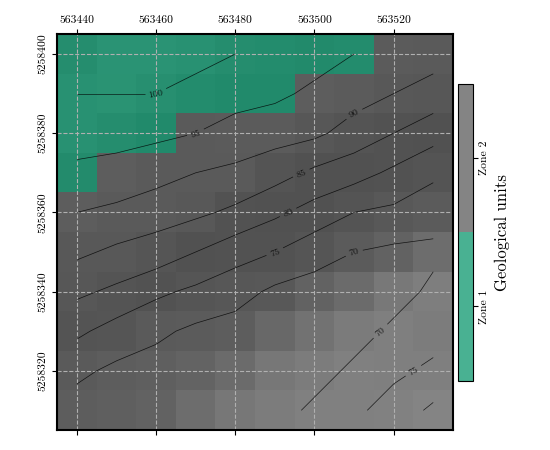

HTML(value='<style> div.jupyter-widgets.widget-label {display: none;} </style>')

In [3]:
# Geotechnical parameters for each geological zone
parameters = {  # Zone: (𝜙, 𝑐, 𝛾) → Follow this structure. Add as many zones as in the map "zones"
    1: (35, 3.5, 22),
    2: (31, 8, 22),
}

# Geographic reference system
# (Do not modify it if spatial data is loaded from ASCII raster, otherwise,
#  modify the commented lines below)
spat_ref = header
# spat_ref = {
#     'xy_lowerleft': (header["xllcorner"], header["yllcorner"]),
#     'cell_size': header["cellsize"]
# }

# This is for enhancing the visualization of the results (contours)
contours = np.arange(70, 105, 5)  # (min, max, step)

# Associating geotechnical parameters to each geological zone spatially and plotting
phi, c, gamma = map_zones(parameters, zones)
fig = plot_spatial_field(zones, dem, spat_ref=header, levels=contours,
                   title="Geological units", cmap='Dark2', discrete=True,
                   label=['Zone 1', 'Zone 2'], labelrot=90)
display_fig(fig)

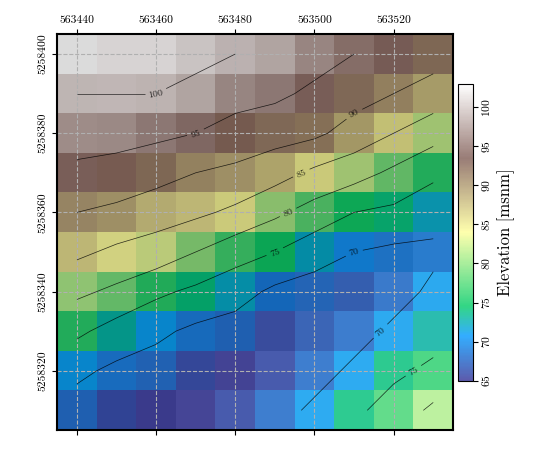

HTML(value='<style> div.jupyter-widgets.widget-label {display: none;} </style>')

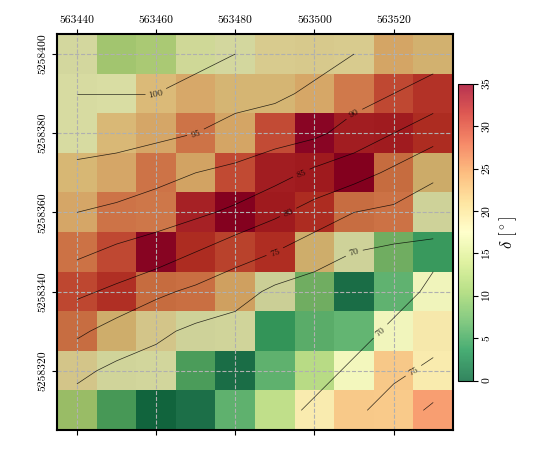

HTML(value='<style> div.jupyter-widgets.widget-label {display: none;} </style>')

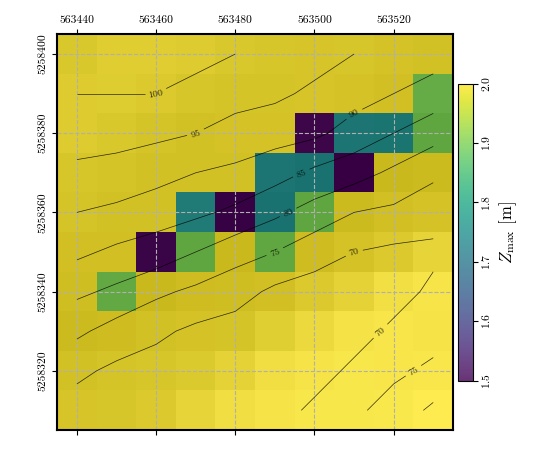

HTML(value='<style> div.jupyter-widgets.widget-label {display: none;} </style>')

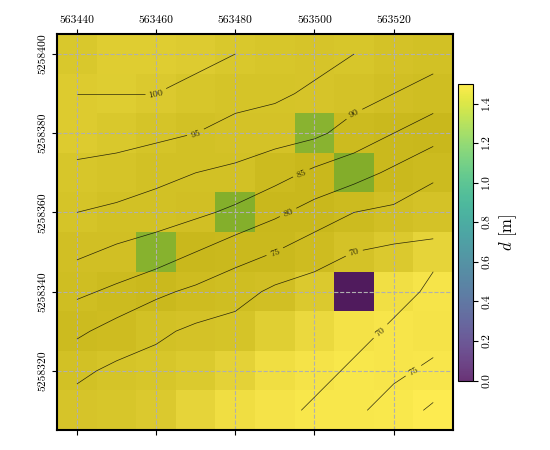

HTML(value='<style> div.jupyter-widgets.widget-label {display: none;} </style>')

In [4]:
# plotting the digital elevation model (dem)
fig = plot_spatial_field(dem, dem, spat_ref=header, levels=contours, labelrot=90,
                         title="Elevation [msnm]", cmap='terrain', discrete=False)
display_fig(fig)
# plotting the spatial distribution of slopes
fig = plot_spatial_field(slope, dem, spat_ref=header, levels=contours,
                         title="$\\delta\\ [^\\circ]$", cmap='RdYlGn_r', labelrot=90)
display_fig(fig)
# plotting the spatial distribution of potential sliding mass depths
fig = plot_spatial_field(depth, dem, spat_ref=header, levels=contours,
                         title="$Z_\\mathrm{max}$ [m]", cmap='viridis', labelrot=90)
display_fig(fig)
# plotting the spatial distribution of watertable depths
fig = plot_spatial_field(depth_w, dem, spat_ref=header, levels=contours,
                         title="$d$ [m]", cmap='viridis', labelrot=90)
display_fig(fig)

## Calculating and plotting the spatial distribution of $\mathrm{FS}_\mathrm{static}$

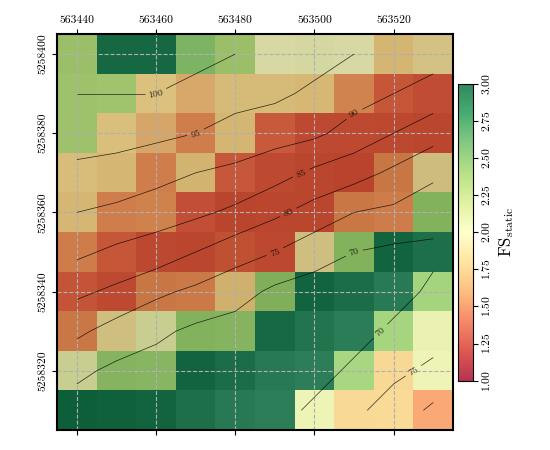

HTML(value='<style> div.jupyter-widgets.widget-label {display: none;} </style>')

In [5]:
fs = factor_of_safety(depth, depth_w, slope, phi, c, gamma, ks=0)
fig = plot_spatial_field(fs, dem, spat_ref=header, levels=contours, cmap='RdYlGn',
                         title="$\\mathrm{FS}_\\mathrm{static}$", vmin=1.0, vmax=3.0, labelrot=90)
display_fig(fig)

## Calculating and plotting the spatial distribution of $k_\mathrm{y}$

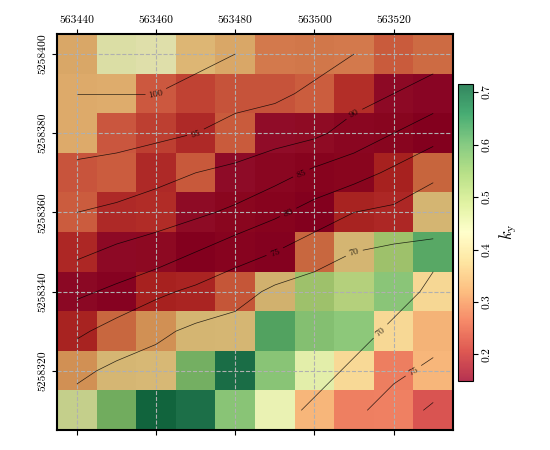

HTML(value='<style> div.jupyter-widgets.widget-label {display: none;} </style>')

In [6]:
ky = get_ky(depth, depth_w, slope, phi, c, gamma)
fig = plot_spatial_field(ky, dem, spat_ref=header, levels=contours, cmap='RdYlGn',
                         title="$k_\\mathrm{y}$", labelrot=90)
display_fig(fig)

## Calculating and plotting the spatial distribution of $\mathrm{FS}_\mathrm{pseudostatic}$ when $k_\mathrm{s}$ is 40% of $k_\mathrm{y}$

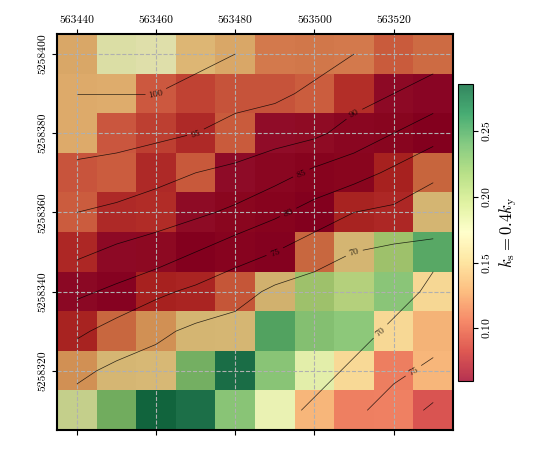

HTML(value='<style> div.jupyter-widgets.widget-label {display: none;} </style>')

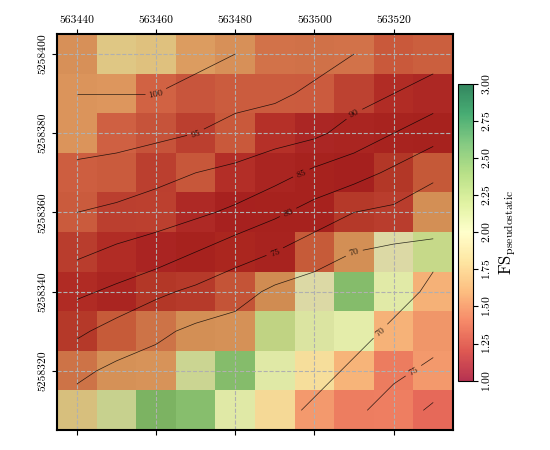

HTML(value='<style> div.jupyter-widgets.widget-label {display: none;} </style>')

In [7]:
# Calculating factor of safety for pseudostatic conditions and plotting its spatial distribution
ks = 0.4 * ky
fig = plot_spatial_field(ks, dem, spat_ref=header, levels=contours, cmap='RdYlGn',
                         title="$k_\\mathrm{s} = 0.4 k_\\mathrm{y}$", labelrot=90)
display_fig(fig)

fs_ks = factor_of_safety(depth, depth_w, slope, phi, c, gamma, ks=ks)
fig = plot_spatial_field(fs_ks, dem, spat_ref=header, levels=contours, cmap='RdYlGn',
                         title="$\\mathrm{FS}_\\mathrm{pseudostatic}$", vmin=1.0, vmax=3.0, labelrot=90)
display_fig(fig)

## Calculating and plotting the spatial distribution of $u_\mathrm{p}$

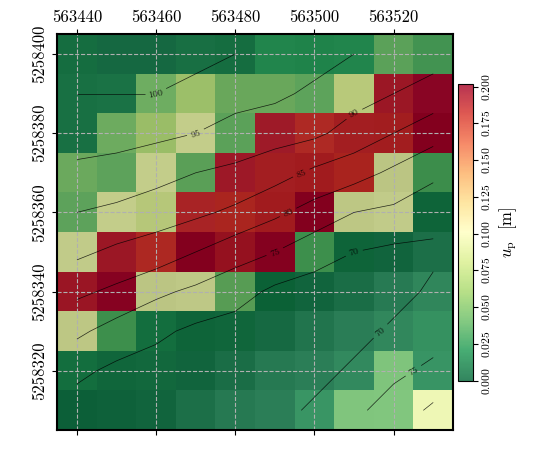

HTML(value='<style> div.jupyter-widgets.widget-label {display: none;} </style>')

In [8]:
# Calculating permanent displacements and plotting its spatial distribution
permanent_disp = spatial_newmark(time, accel, ky, g)
fig = plot_spatial_field(permanent_disp, dem, spat_ref=header, levels=contours,
                         title="$u_\\mathrm{p}$  [m]", cmap='RdYlGn_r', labelrot=90)
axis_labels = fig.get_axes()[0].get_xticklabels() + fig.get_axes()[0].get_yticklabels()
[label.set_fontsize('large') for label in axis_labels]
display_fig(fig)

## Plotting the Newmark method at a specific location

Zone: 2.0, Height: 91.0, Slope: 35.0°, FS: 1.323, kᵧ: 0.159, uₚ: 0.183


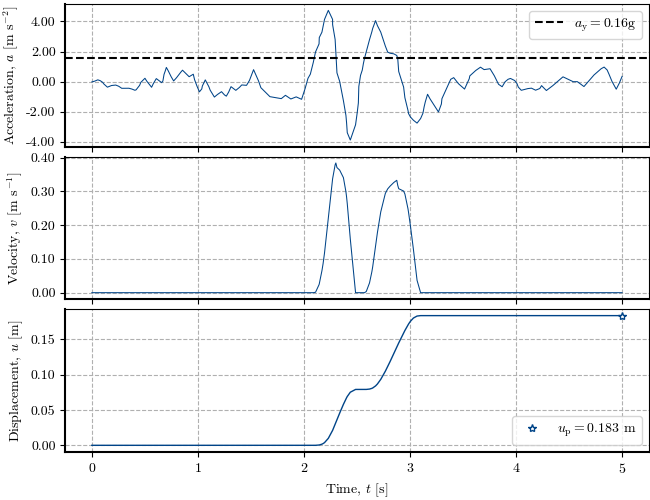

HTML(value='<style> div.jupyter-widgets.widget-label {display: none;} </style>')

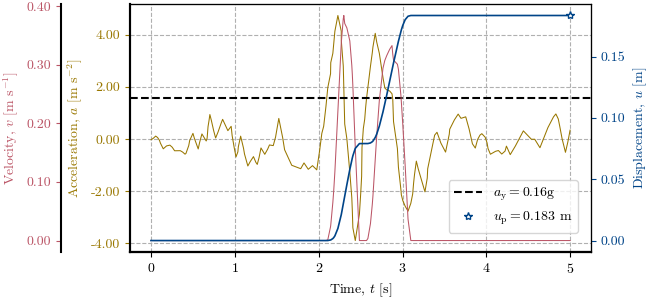

HTML(value='<style> div.jupyter-widgets.widget-label {display: none;} </style>')

In [9]:
# Verification of the Direct Newmark Method at one cell
x, y = 563500, 5258380 # Coordinates of the cell to verify
cell = get_idx_at_coords(x=x, y=y, spat_ref=header)  # Cell to verify

print(f"Zone: {zones[cell]}, Height: {dem[cell]}, Slope: {slope[cell]}°, FS: {fs[cell]}, kᵧ: {ky[cell]}, uₚ: {permanent_disp[cell]}")
    # zones[cell], dem[cell], slope[cell], fs[cell], ky[cell], permanent_disp[cell])

# Plotting the Newmark method at the cell (three plots)
newmark_str = verify_newmark_at_cell(cell, time, accel, g, depth, depth_w, slope, phi, c, gamma)
fig = plot_newmark_integration(newmark_str)
display_fig(fig)
# Plotting the Newmark method at the cell (single compressed plot)
fig = plot_newmark_integration(newmark_str, True)
display_fig(fig)